In [1]:
# notebook that explores the effects related to 'requeing'
# reque: to play another chess game within a short period of finishing the last one
# num_reque: the number of reques in a row, the second game in a row being the first reque, the third being the second reque, etc.

# this expands on tyler_reque.ipynb and includes opponent reques

In [2]:
import archives_manager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chess
from chess import Board, pgn

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

In [3]:
df = pd.read_csv('tyler_opp_num_reque.csv')
df = df.dropna()
df['opp_num_reque'] = df['opp_num_reque'].astype(int)
df['opp_time_since_prev'] = df['opp_time_since_prev'].astype(int)
df.head(25)

,unix,player_elo,opp_elo,opp_name,opp_30d,elo_diff,color,player_acc,opp_acc,acc_diff,won,num_reque,time_since_prev,opp_num_reque,opp_time_since_prev
0,1696185098,1090,1063,Quarini,249,27,False,69.43,62.25,7.18,1.0,0,0,2,325
1,1696186352,1097,1091,hgarciarod,339,6,True,78.20,69.40,8.80,1.0,0,1254,2,1108
2,1696187659,1105,1139,HERFJERF,113,-34,False,92.66,80.43,12.23,1.0,0,1307,0,48092
4,1696189372,1113,1105,InkLv,116,8,False,83.82,72.41,11.41,1.0,2,529,1,557
5,1696190619,1121,1105,alamrini,308,16,True,80.57,78.02,2.55,0.0,3,1247,0,5208
6,1696191447,1113,1143,djgreen1,193,-30,True,64.50,57.93,6.57,1.0,4,828,3,832
7,1696192994,1122,1088,Pytoo91,221,34,False,51.35,64.64,-13.29,0.0,0,1547,0,1318
8,1696193859,1113,1078,mumergaddafi,121,35,True,73.48,58.18,15.30,1.0,1,865,18,892
9,1696196998,1120,1122,Copertus,505,-2,True,79.47,66.51,12.96,1.0,0,3139,0,13265
10,1696198095,1128,1109,CyborgCerberus94,42,19,False,65.14,81.79,-16.65,0.0,1,1097,0,2098


c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


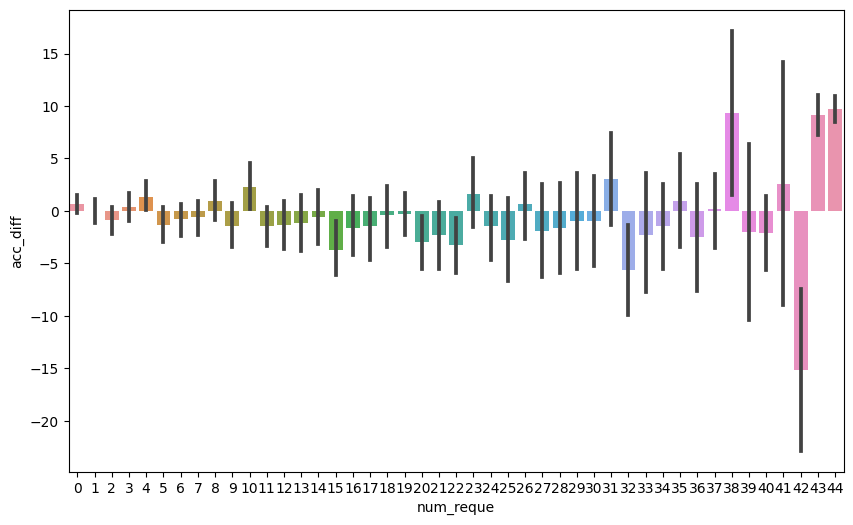

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_reque', y='acc_diff', data=df, errorbar=('ci', 80))
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


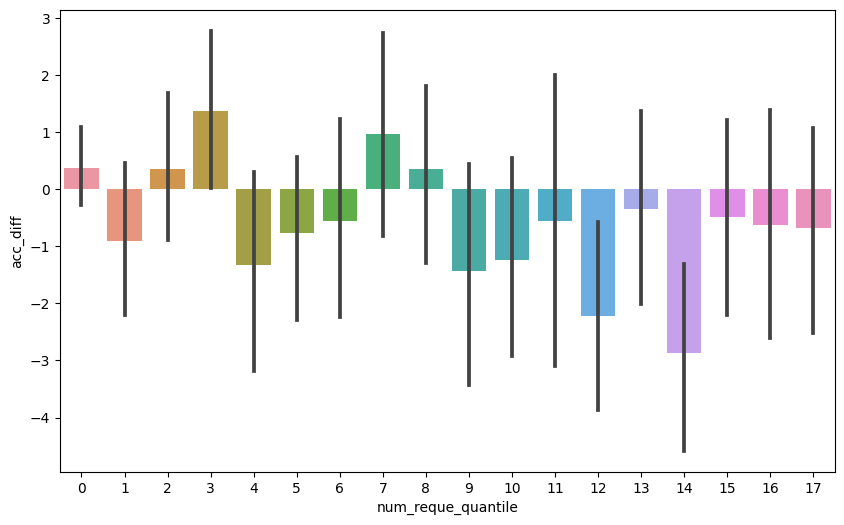

In [5]:
df_plot = df.copy()
df_plot['num_reque_quantile'] = pd.qcut(df_plot['num_reque'], 25, labels=False, duplicates='drop')

# Create the barplot using the quantiles
plt.figure(figsize=(10, 6))
sns.barplot(x='num_reque_quantile', y='acc_diff', data=df_plot, errorbar=('ci', 80))
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


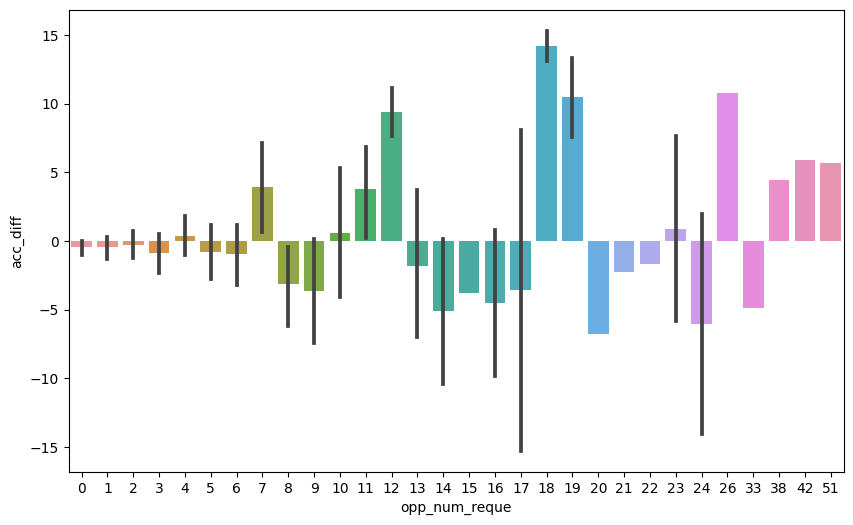

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='opp_num_reque', y='acc_diff', data=df, errorbar=('ci', 80))
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


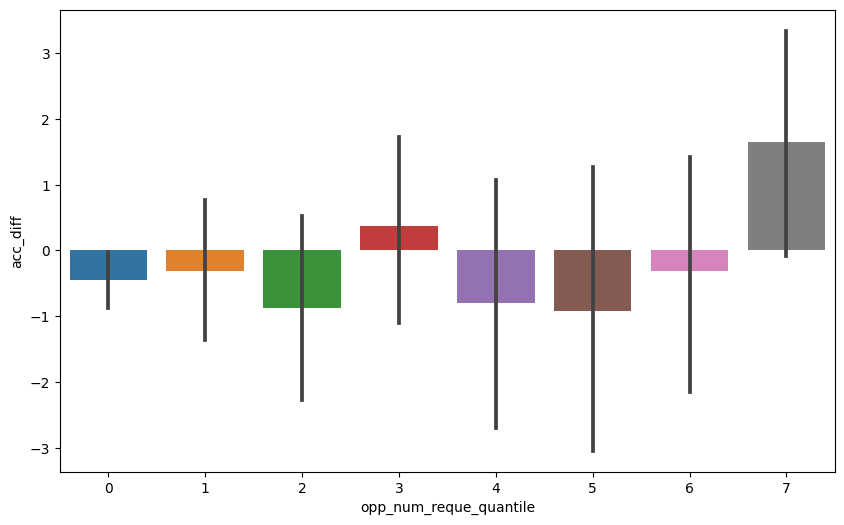

In [7]:
df_plot = df.copy()
df_plot['opp_num_reque_quantile'] = pd.qcut(df_plot['opp_num_reque'], 25, labels=False, duplicates='drop')

# Create the barplot using the quantiles
plt.figure(figsize=(10, 6))
sns.barplot(x='opp_num_reque_quantile', y='acc_diff', data=df_plot, errorbar=('ci', 80))
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


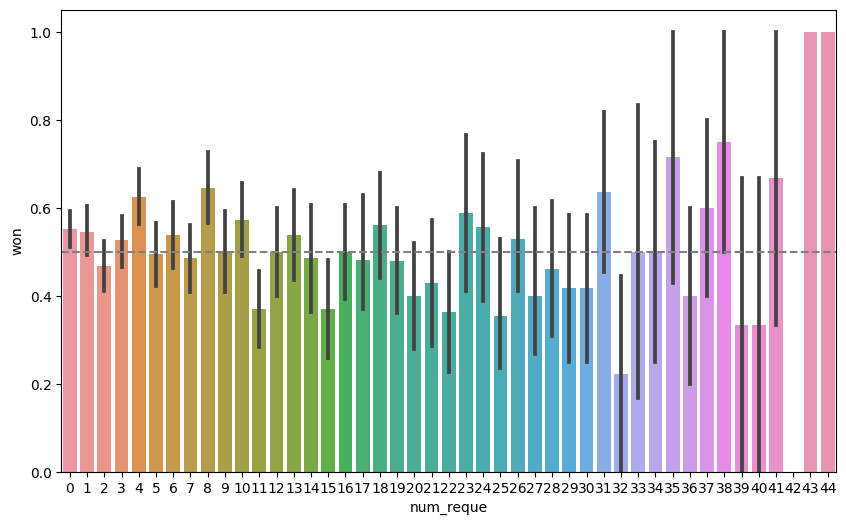

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_reque', y='won', data=df, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


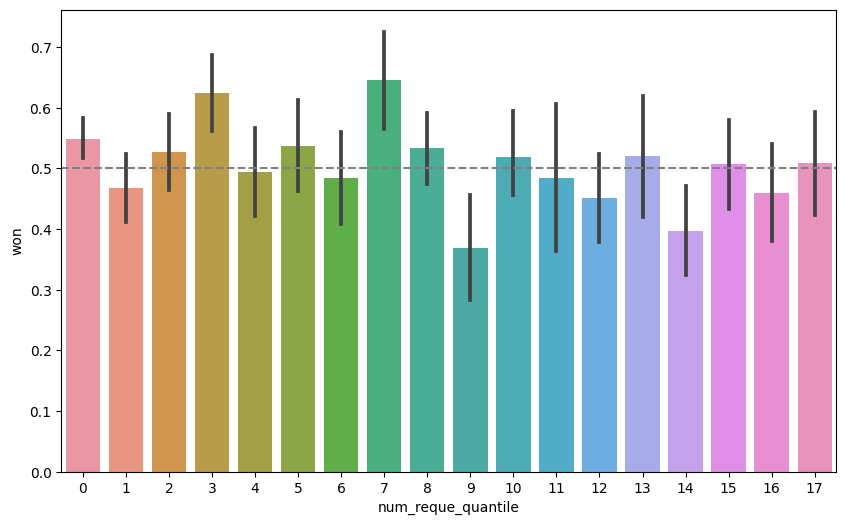

In [9]:
df_plot = df.copy()
df_plot['num_reque_quantile'] = pd.qcut(df_plot['num_reque'], 25, labels=False, duplicates='drop')

# Create the barplot using the quantiles
plt.figure(figsize=(10, 6))
sns.barplot(x='num_reque_quantile', y='won', data=df_plot, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


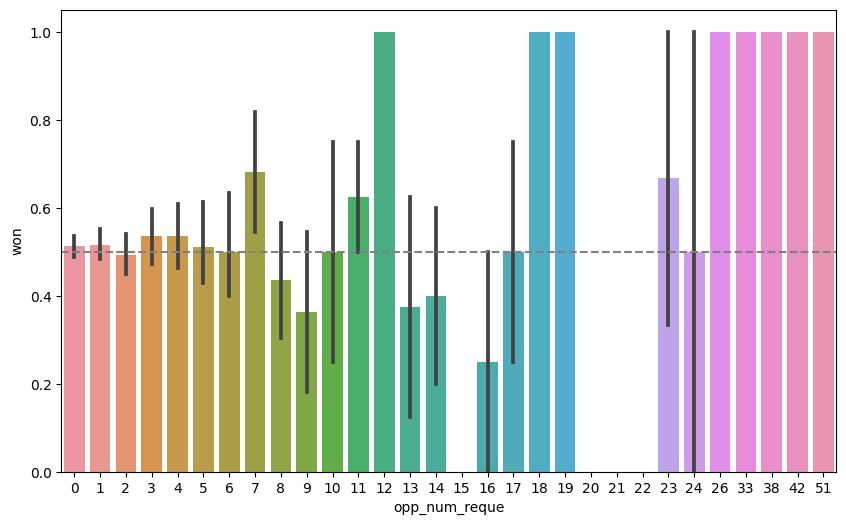

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='opp_num_reque', y='won', data=df, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


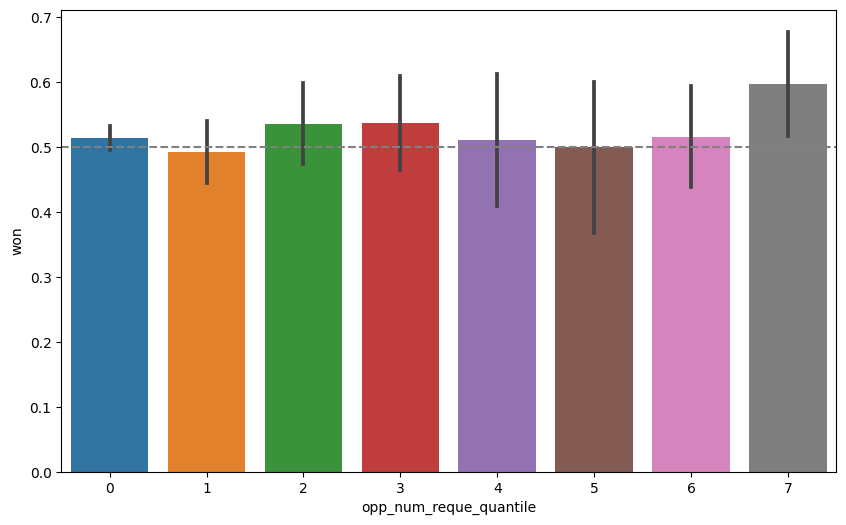

In [11]:
df_plot = df.copy()
df_plot['opp_num_reque_quantile'] = pd.qcut(df_plot['opp_num_reque'], 25, labels=False, duplicates='drop')

# Create the barplot using the quantiles
plt.figure(figsize=(10, 6))
sns.barplot(x='opp_num_reque_quantile', y='won', data=df_plot, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


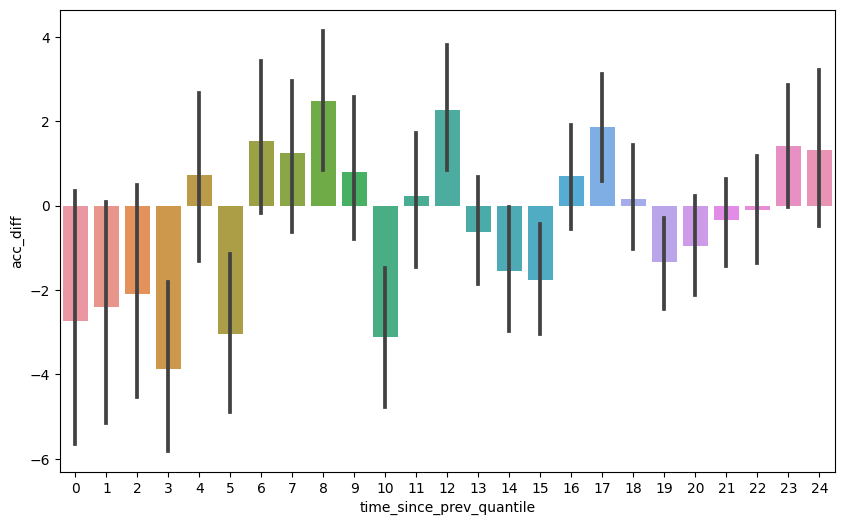

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


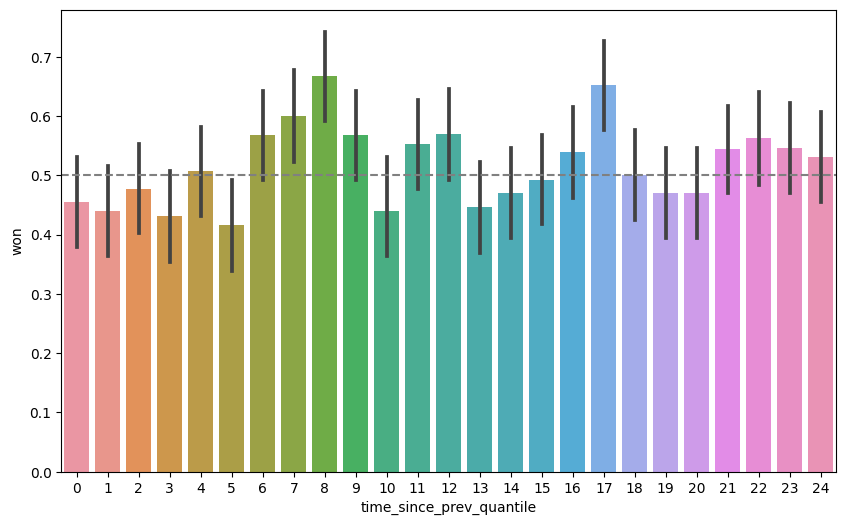

In [12]:
df_plot = df.copy()
df_plot['time_since_prev_quantile'] = pd.qcut(df_plot['time_since_prev'], 25, labels=False, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.barplot(x='time_since_prev_quantile', y='acc_diff', data=df_plot, errorbar=('ci', 80))
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='time_since_prev_quantile', y='won', data=df_plot, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


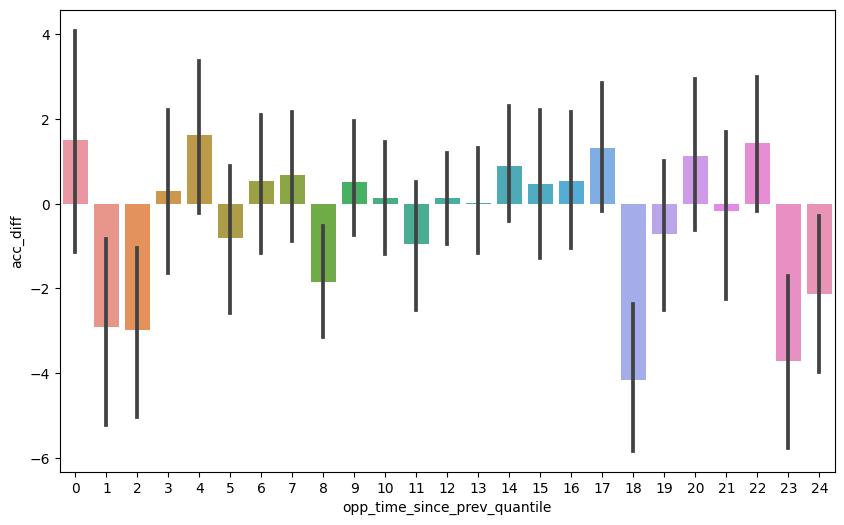

c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adam Cunningham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


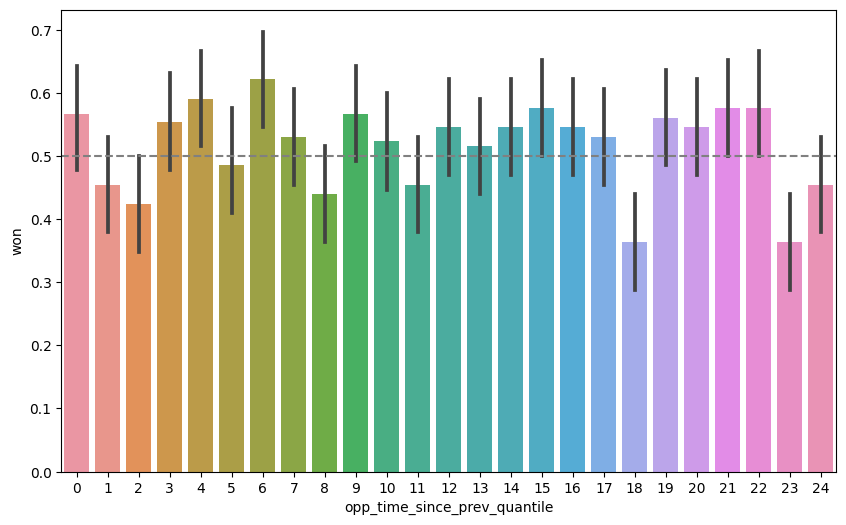

In [26]:
df_plot = df.copy()
df_plot['opp_time_since_prev_quantile'] = pd.qcut(df_plot['opp_time_since_prev'], 25, labels=False, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.barplot(x='opp_time_since_prev_quantile', y='acc_diff', data=df_plot, errorbar=('ci', 80))
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='opp_time_since_prev_quantile', y='won', data=df_plot, errorbar=('ci', 80))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

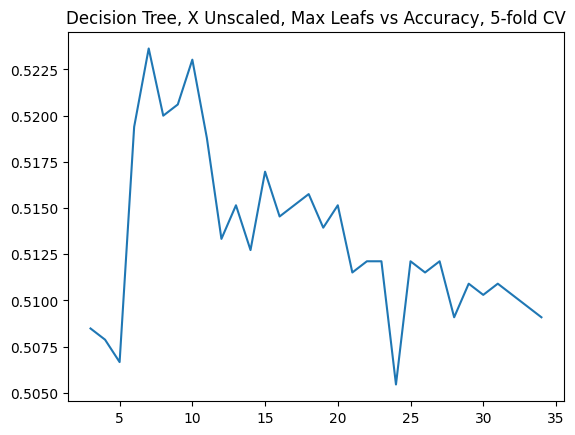

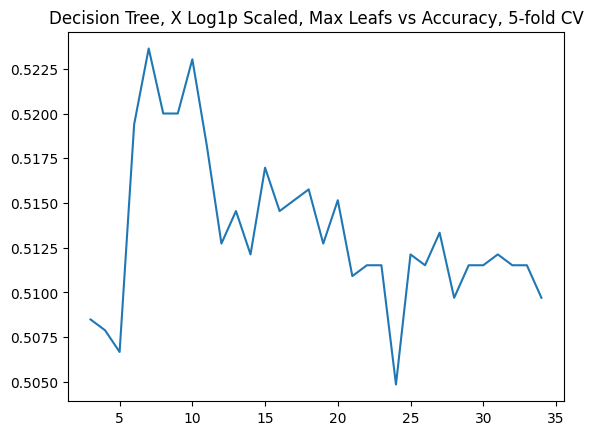

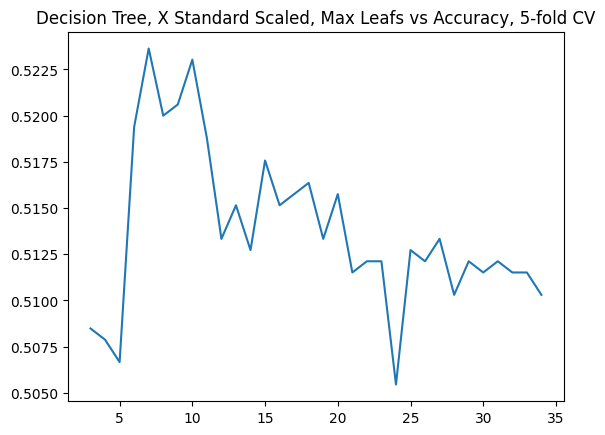

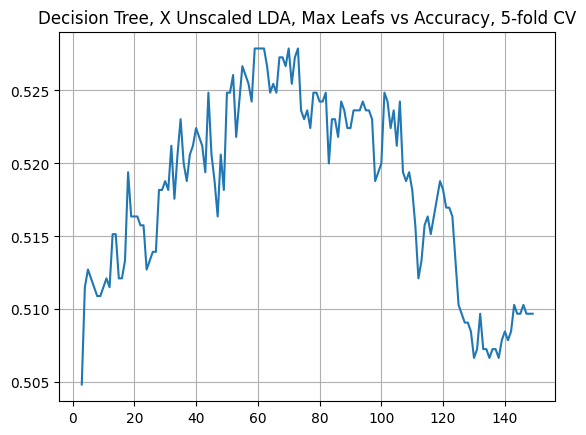

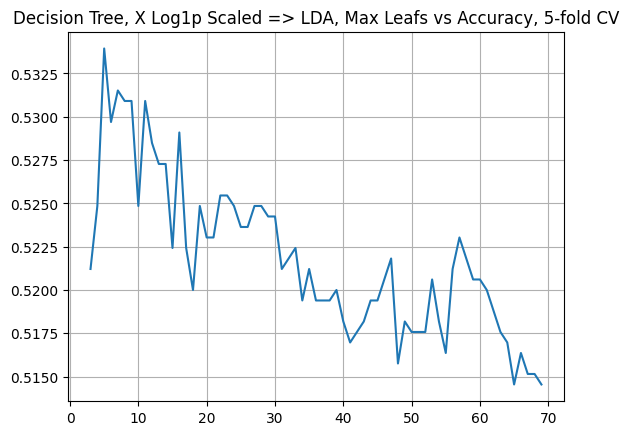

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X = df[['time_since_prev', 'num_reque', 'opp_time_since_prev', 'opp_num_reque']]
y = df['won']

scores = {}

# Decison Tree
for i in range(3, 35):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)

    # Cross-validation
    cv_scores = cross_val_score(tree, X, y, cv=5)

    scores[i] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title("Decision Tree, X Unscaled, Max Leafs vs Accuracy, 5-fold CV")
plt.show()

###

X_log_scaled = np.log1p(X)

scores = {}

# Decison Tree
for i in range(3, 35):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)

    # Cross-validation
    cv_scores = cross_val_score(tree, X_log_scaled, y, cv=5)

    scores[i] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title("Decision Tree, X Log1p Scaled, Max Leafs vs Accuracy, 5-fold CV")
plt.show()

###

X_std_scaled = StandardScaler().fit_transform(X)

scores = {}

# Decison Tree
for i in range(3, 35):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)

    # Cross-validation
    cv_scores = cross_val_score(tree, X_std_scaled, y, cv=5)

    scores[i] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title("Decision Tree, X Standard Scaled, Max Leafs vs Accuracy, 5-fold CV")
plt.show()

###

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

scores = {}

# Decison Tree
for i in range(3, 150):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)

    # Cross-validation
    cv_scores = cross_val_score(tree, X_lda, y, cv=5)

    scores[i] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title("Decision Tree, X Unscaled LDA, Max Leafs vs Accuracy, 5-fold CV")
plt.grid()
plt.show()

###

X_log_scaled = np.log1p(X)
lda = LinearDiscriminantAnalysis()
X_log_scaled_lda = lda.fit_transform(X_log_scaled, y)

scores = {}

# Decison Tree
for i in range(3, 70):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)

    # Cross-validation
    cv_scores = cross_val_score(tree, X_log_scaled_lda, y, cv=5)

    scores[i] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title("Decision Tree, X Log1p Scaled => LDA, Max Leafs vs Accuracy, 5-fold CV")
plt.grid()
plt.show()


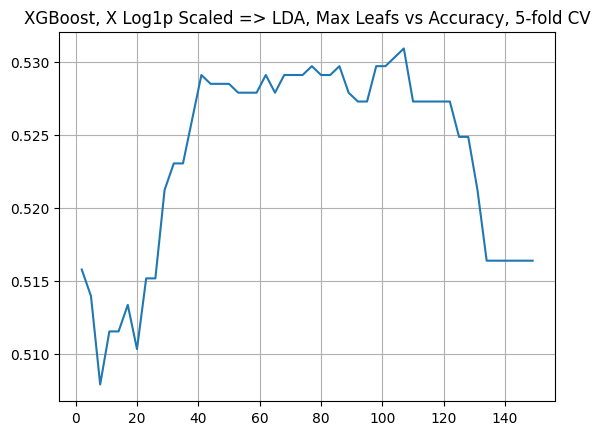

In [25]:
import xgboost as xgb

X = df[['time_since_prev', 'num_reque', 'opp_time_since_prev', 'opp_num_reque']]
y = df['won']

max_depth = 2
max_leaves = [0, 3, 5, 8, 12, 20, 30, 50]
learning_rate = 0.03
max_leaves = 0

X_log_scaled = np.log1p(X)
lda = LinearDiscriminantAnalysis()
X_log_scaled_lda = lda.fit_transform(X_log_scaled, y)

scores = {}

for n in range(2, 150, 3):
    model = xgb.XGBClassifier(n_estimators=n, learning_rate=learning_rate, max_depth=max_depth, max_leaves=max_leaves)

    # Cross-validation
    cv_scores = cross_val_score(model, X_log_scaled_lda, y, cv=5)

    #print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
    scores[n] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title(f"XGBoost, X Log1p Scaled => LDA, Max Leafs vs Accuracy, 5-fold CV")
plt.grid()
plt.show()

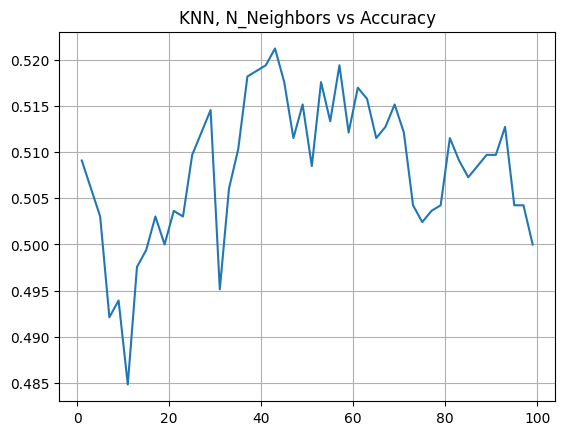

In [40]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['time_since_prev', 'num_reque', 'opp_time_since_prev', 'opp_num_reque']]
y = df['won']

scores = {}

for n in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    cv_scores = cross_val_score(knn, X, y, cv=5)

    scores[n] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title(f"KNN, N_Neighbors vs Accuracy")
plt.grid()
plt.show()

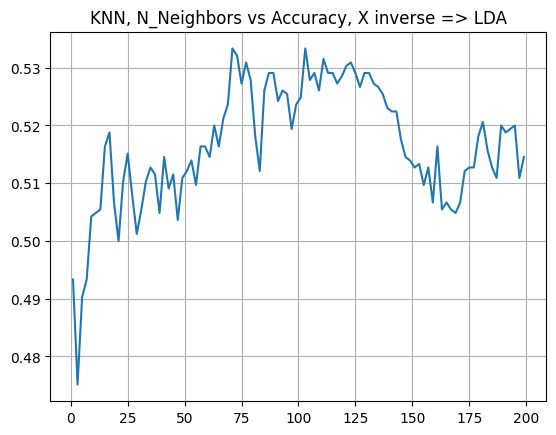

In [63]:
X_inverse = pd.concat(
    [
        1 / (X[['num_reque', 'opp_num_reque']] + 0.01),
        X[['time_since_prev', 'opp_time_since_prev']]
    ],
    axis = 1
)

lda = LinearDiscriminantAnalysis()
X_inverse_lda = lda.fit_transform(X_inverse, y)

scores = {}

for n in range(1, 200, 2):
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    cv_scores = cross_val_score(knn, X_inverse_lda, y, cv=5)

    scores[n] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title(f"KNN, N_Neighbors vs Accuracy, X inverse => LDA")
plt.grid()
plt.show()

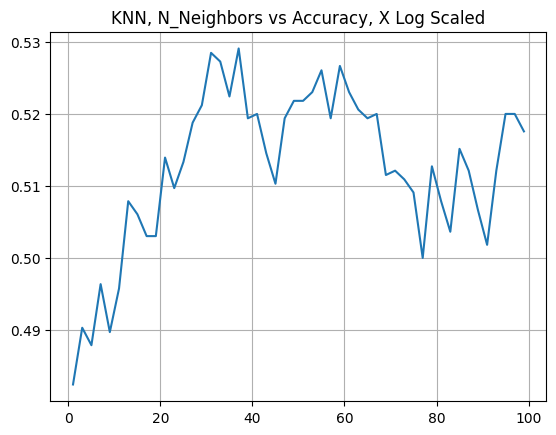

In [52]:
X_log_scaled = np.log1p(X)

scores = {}

for n in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    cv_scores = cross_val_score(knn, X_log_scaled, y, cv=5)

    scores[n] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title(f"KNN, N_Neighbors vs Accuracy, X Log Scaled")
plt.grid()
plt.show()

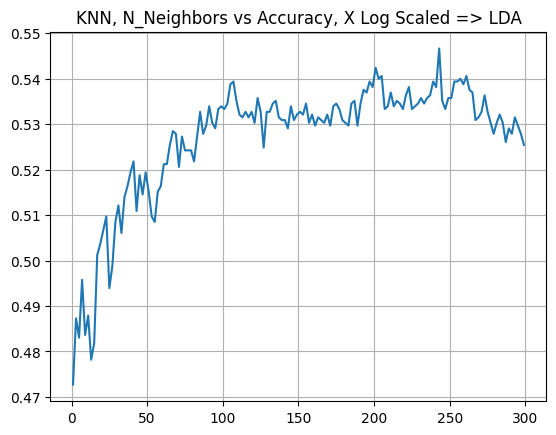

In [54]:
X_log_scaled = np.log1p(X)

lda = LinearDiscriminantAnalysis()
X_log_scaled_lda = lda.fit_transform(X_log_scaled, y)

scores = {}

for n in range(1, 300, 2):
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    cv_scores = cross_val_score(knn, X_log_scaled_lda, y, cv=5)

    scores[n] = np.mean(cv_scores)

plt.plot(scores.keys(), scores.values())
plt.title(f"KNN, N_Neighbors vs Accuracy, X Log Scaled => LDA")
plt.grid()
plt.show()